# University-Industry Collaboration: Article Processing

This script prepares metadata from the Scopus database for analysis in VOSviewer.  It performs basic data cleaning (e.g. remove duplicates; non-English articles; drop articles with no data in title, abstract, keywords), higher-level filtering (e.g. select articles based on keywords), and article classification (e.g. classify articles based on author affiliation and funding source).

+ **Input data:** Scopus metadata in csv format  
+ **Output data:** Processed Scopus metadata in csv format for analysis in VOSviewer


Developed by Tyler Reinmund  
Date: 15 June 2021

Department of Science and Technology Studies  
University College London

In [2]:
# Import libraries
import glob
import pandas as pd
import numpy as np
import re
import string
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the pre-processed data retrieved from the ID search

id_path = '../data/id_search' # Adjust file path
all_files = glob.glob(id_path + "/*.csv") # Adjust file name
li = []

for filename in all_files:
    frame = pd.read_csv(filename, index_col=None, header=0)
    li.append(frame)
    
df = pd.concat(li, axis=0, ignore_index=True, sort=False)

C:\Users\trein\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,7,8,9,10,11,19,20,21,22,26,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
list(df.columns)

['Authors',
 'Author(s) ID',
 'Title',
 'Year',
 'Source title',
 'Volume',
 'Issue',
 'Art. No.',
 'Page start',
 'Page end',
 'Page count',
 'Cited by',
 'DOI',
 'Link',
 'Affiliations',
 'Authors with affiliations',
 'Abstract',
 'Author Keywords',
 'Index Keywords',
 'Molecular Sequence Numbers',
 'Chemicals/CAS',
 'Tradenames',
 'Manufacturers',
 'Funding Details',
 'Funding Text 1',
 'Funding Text 2',
 'Funding Text 3',
 'Funding Text 4',
 'References',
 'Correspondence Address',
 'Editors',
 'Sponsors',
 'Publisher',
 'Conference name',
 'Conference date',
 'Conference location',
 'Conference code',
 'ISSN',
 'ISBN',
 'CODEN',
 'PubMed ID',
 'Language of Original Document',
 'Abbreviated Source Title',
 'Document Type',
 'Publication Stage',
 'Open Access',
 'Source',
 'EID',
 'Funding Text 5',
 'Funding Text 6',
 'Funding Text 7',
 'Funding Text 8',
 'Unnamed: 52',
 'Unnamed: 53',
 'Unnamed: 54',
 'Unnamed: 55',
 'Unnamed: 56',
 'Unnamed: 57',
 'Unnamed: 58',
 'Unnamed: 59',
 .

In [7]:
# Drop 'Unnamed: X' columns
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]

In [8]:
# Reorder columns so "Funding Text" columns are together
cols = ['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title',
        'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
        'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations',
        'Authors with affiliations', 'Abstract', 'Author Keywords',
        'Index Keywords', 'Molecular Sequence Numbers', 'Chemicals/CAS',
        'Tradenames', 'Manufacturers', 'Funding Details', 'Funding Text 1',
        'Funding Text 2', 'Funding Text 3', 'Funding Text 4', 'Funding Text 5',
        'Funding Text 6', 'Funding Text 7', 'Funding Text 8', 'References',
        'Correspondence Address', 'Editors', 'Sponsors', 'Publisher',
        'Conference name', 'Conference date', 'Conference location',
        'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
        'Language of Original Document', 'Abbreviated Source Title', 'Document Type',
        'Publication Stage', 'Open Access', 'Source', 'EID']

# Apply new column order to df
df = df[cols]
print(df.shape)
df.columns

(37869, 52)


Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'Funding Text 4',
       'Funding Text 5', 'Funding Text 6', 'Funding Text 7', 'Funding Text 8',
       'References', 'Correspondence Address', 'Editors', 'Sponsors',
       'Publisher', 'Conference name', 'Conference date',
       'Conference location', 'Conference code', 'ISSN', 'ISBN', 'CODEN',
       'PubMed ID', 'Language of Original Document',
       'Abbreviated Source Title', 'Document Type', 'Publication Stage',
       'Open Access', 'Source', 'EID'],
      dtype='object')

## Initial data selection

1. Drop articles with no data in title, abstract, or affiliations
2. Drop duplicates
3. Drop articles with invalid value for Year
4. Drop articles written before 2015
5. Drop non-English articles

In [9]:
# Drop articles with NaN in Title, Abstract, Affiliations
df_1 = df.dropna(axis=0, subset=['Abstract', 'Title', 'Affiliations'])

df_1.shape

(37494, 52)

In [10]:
# Drop articles that are duplicates of Title
df_2 = df_1.drop_duplicates(subset=['Title']).reset_index(drop=True)
df_2.shape

(32471, 52)

In [11]:
# Drop rows where Year is not a digit
df_2['Year'] = pd.to_numeric(df_2['Year'], errors='coerce')
df_3 = df_2.dropna(axis=0, subset=['Year'])
print(df_3.shape)
df_3['Year'].unique()

(32460, 52)


array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2010., 2009., 2008., 2007., 2006., 2005., 2004.,
       2003., 2002., 2001., 2000., 1999., 1998., 1997., 1996., 1995.,
       1994., 1993., 1991., 1988., 1986., 1978., 1979., 1981., 1983.,
       1985., 1987., 1989., 1990., 1992., 1984., 1980., 1982., 1977.,
       1976.])

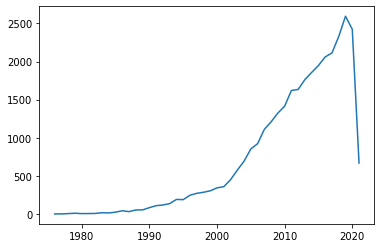

In [12]:
sns.lineplot(data=df_3.groupby('Year').count()['Title'])

In [13]:
# Select articles written after 2015
df_4 = df_3[df_3['Year'] >= 2015]
print(df_4.shape)
df_4['Year'].unique()

(14135, 52)


array([2021., 2020., 2019., 2018., 2017., 2016., 2015.])

In [14]:
# Select articles written in English
df_4 = df_4.dropna(axis=0, subset=['Language of Original Document'])
df_5 = df_4[df_4['Language of Original Document'].str.contains('English')].reset_index(drop=True)
print(df_5.shape)
df_5['Language of Original Document'].unique()

(14020, 52)


array(['English', 'English; German', 'English; Chinese',
       'English; Italian', 'English; Portuguese'], dtype=object)

# Secondary data selection

1. Filter articles based on keyword search
2. Classify articles as industry or non-industry affiliated

In [15]:
# Create list of AI ethics keywords to query dataset
ethics_regex = ('accountab[a-z]*|safety|ethic[a-z]*|bias[a-z]*|business model|explaina[a-z]*|fair|fairness|privacy|secur[a-z]*|sustainab[a-z]*|regulation|legislation|transparen[a-z]*')

In [16]:
# Select the rows that match the AI ethics keywords in Title, Abstract, or Author Keywords column
mask = df_5[['Title', 'Abstract', 'Author Keywords']].apply(lambda x: x.str.contains(ethics_regex, regex=True, flags=re.IGNORECASE))
df_6 = df_5[mask.any(axis=1)]
df_6.shape

(3340, 52)

In [17]:
# Load AIES, FATML, and FAccT publications
conf_path = "../data/conference"
all_files = glob.glob(conf_path + "/*.csv")
li = []

for filename in all_files:
    frame = pd.read_csv(filename, index_col=None, header=0)
    li.append(frame)
    
df_conf = pd.concat(li, axis=0, ignore_index=True, sort=False)

In [18]:
# Remove articles without Title, affiliations, or abstracts
df_conf = df_conf.dropna(axis=0, subset=['Abstract', 'Title', 'Author Keywords', 'Authors', 'Author(s) ID'])

# Drop articles that are duplicates of Title
df_conf = df_conf.drop_duplicates(subset=['Title']).reset_index(drop=True)

# Drop rows where Year is not a digit
df_conf['Year'] = pd.to_numeric(df_2['Year'], errors='coerce')
df_conf = df_conf.dropna(axis=0, subset=['Year'])
print(df_conf.shape)
df_conf['Year'].unique()

(363, 452)


array([2021., 2020., 2019., 2018.])

In [20]:
list(df_conf.columns)

['Authors',
 'Author(s) ID',
 'Title',
 'Year',
 'Source title',
 'Volume',
 'Issue',
 'Art. No.',
 'Page start',
 'Page end',
 'Page count',
 'Cited by',
 'DOI',
 'Link',
 'Affiliations',
 'Authors with affiliations',
 'Abstract',
 'Author Keywords',
 'Index Keywords',
 'Molecular Sequence Numbers',
 'Chemicals/CAS',
 'Tradenames',
 'Manufacturers',
 'Funding Details',
 'Funding Text 1',
 'Funding Text 2',
 'References',
 'Correspondence Address',
 'Editors',
 'Sponsors',
 'Publisher',
 'Conference name',
 'Conference date',
 'Conference location',
 'Conference code',
 'ISSN',
 'ISBN',
 'CODEN',
 'PubMed ID',
 'Language of Original Document',
 'Abbreviated Source Title',
 'Document Type',
 'Publication Stage',
 'Open Access',
 'Source',
 'EID',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 'Unnamed: 52',
 'Unnamed: 53',
 'Unnamed: 54',
 'Unnamed: 55',
 'Unnamed: 56',
 'Unnamed: 57',
 'Unnamed: 58',
 'Unnamed: 59',
 ...]

In [21]:
# Drop 'Unnamed: X' columns
df_conf = df_conf[df_conf.columns.drop(list(df_conf.filter(regex='Unnamed')))]

In [22]:
list(df_conf.columns)

['Authors',
 'Author(s) ID',
 'Title',
 'Year',
 'Source title',
 'Volume',
 'Issue',
 'Art. No.',
 'Page start',
 'Page end',
 'Page count',
 'Cited by',
 'DOI',
 'Link',
 'Affiliations',
 'Authors with affiliations',
 'Abstract',
 'Author Keywords',
 'Index Keywords',
 'Molecular Sequence Numbers',
 'Chemicals/CAS',
 'Tradenames',
 'Manufacturers',
 'Funding Details',
 'Funding Text 1',
 'Funding Text 2',
 'References',
 'Correspondence Address',
 'Editors',
 'Sponsors',
 'Publisher',
 'Conference name',
 'Conference date',
 'Conference location',
 'Conference code',
 'ISSN',
 'ISBN',
 'CODEN',
 'PubMed ID',
 'Language of Original Document',
 'Abbreviated Source Title',
 'Document Type',
 'Publication Stage',
 'Open Access',
 'Source',
 'EID']

In [23]:
# Concatenate the articles published in AI ethics conferences and those identified in keyword search
df_full = pd.concat([df_6, df_conf], axis=0, ignore_index=True, sort=False)

# Funding Text 4 - 8 columns are empty, so drop them
df_full = df_full.drop(columns=['Funding Text 4', 'Funding Text 5', 'Funding Text 6', 'Funding Text 7', 'Funding Text 8'])

# Drop title duplicates
df_full = df_full.drop_duplicates(subset=['Title']).reset_index(drop=True)
df_full.shape

(3408, 47)

## Categorise articles by industry affiliation

In [24]:
# Create a regex for industry-affiliation
industry_regex = ('Accenture|Alibaba|Amazon|\bAWS\b|Apple|Booz Allen|Bosch|DeepMind|Facebook|Google|Huawei|IBM|Intel\b|Jigsaw|Microsoft|Nvidia|OpenAI|Partnership on AI|Upturn|Salesforce|Samsung|SAP|Tata\b|Tencent|Uber|Vector Institute')

In [26]:
# Select the rows that have industry names in Affiliations, Funding Text columns
mask = df_full[['Affiliations', 'Funding Text 1', 'Funding Text 2', 'Funding Text 3']].apply(lambda x: x.str.contains(industry_regex, regex=True))
df_industry = df_full[mask.any(axis=1)]
df_industry.shape

(591, 47)

In [27]:
# Select articles that do not have industry names in Affiliations or Funding Text columns
df_academia = df_full[~mask.any(axis=1)]
df_academia.shape

(2817, 47)

In [57]:
# Save dataframes to CSV for manual review and VOSviewer analysis
df_industry.to_csv(os.path.join('../data/ready for analysis', 'scopus_industry_17.06.2021.csv'), encoding='utf-8-sig')
df_academia.to_csv(os.path.join('../data/ready for analysis', 'scopus_academia_17.06.2021.csv'), encoding='utf-8-sig')